In [1]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Files = '/content/drive/MyDrive/Thesis_Files/'

Mounted at /content/drive


In [2]:
### Importing common items
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from fastai.vision.all import *
from fastai.callback.tracker import SaveModelCallback

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['axes.grid'] = False

In [3]:
# dmdt_by_Name_Band_50x50 = '/home/shoaib/Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50.pkl'
dmdt_by_Name_Band_file = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equivalent_bins.pkl'

dm_bins = np.load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dm_bins.npy')
dt_bins = np.load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dt_bins.npy')

def numpy_to_pil(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return PILImage.create(Image.fromarray((numpy_array * 255).astype(np.uint8)))

def norm(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return numpy_array

Let's understand our distribution a little better.

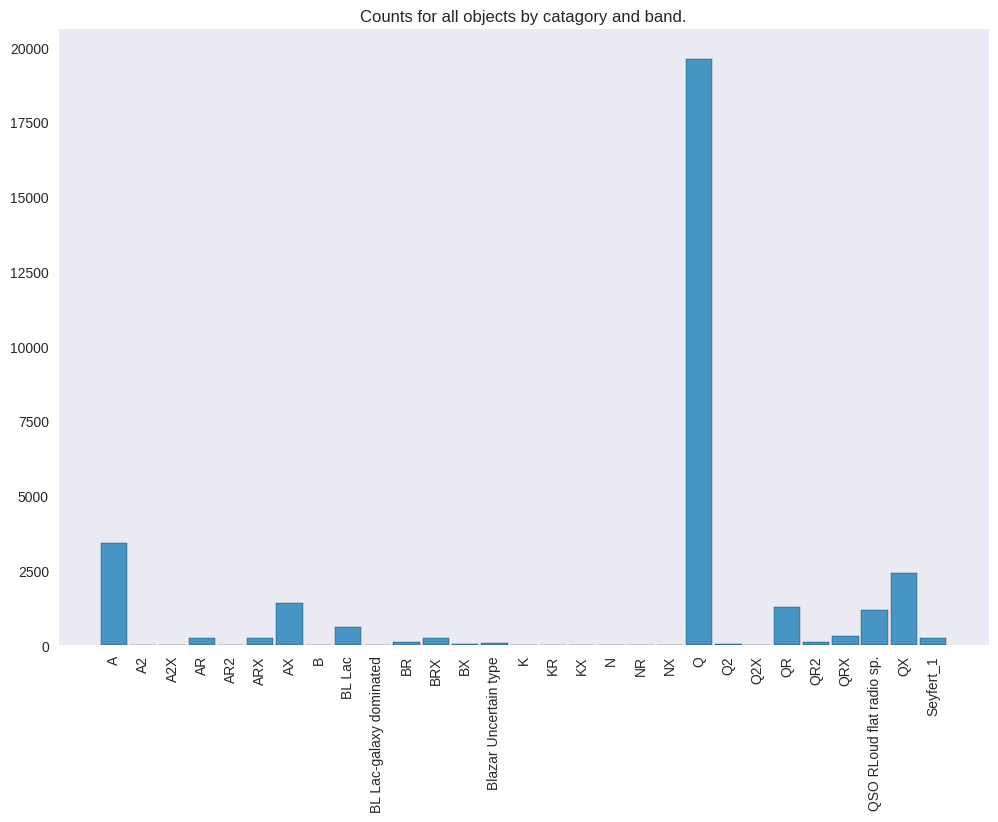

In [6]:
### plotting the distribution
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
type_array = dmdt_by_Name_Band['type'].to_numpy()

plt.figure(figsize=(12,8))

counts, bin_edges, _ = plt.hist(type_array, bins=len(set(type_array)), edgecolor='black', alpha=0.7, align='mid', rwidth=0.9)

categories = sorted(set(type_array))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.xticks(bin_centers, labels=categories, rotation=90)
plt.title('Counts for all objects by catagory and band.')

plt.show()

del type_array, counts, bin_edges, dmdt_by_Name_Band

We'll only consider the Q, QR, and QX catagories, while watching out for that large diaparity!

In [4]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])]
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']
dmdt_by_Name_Band = dmdt_by_Name_Band.drop(columns=['n_good_det', 'band', 'hist_p_scale'])
dmdt_by_Name_Band

,name,type,histogram
6565,1WGA J16290+3724A,Q,"[[[0.0, 1.1455059890871462e-05, 0.0], [0.0, 2.672847307870008e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 3.8183532969571546e-06, 0.0], [0.0, 0.0, 0.0], [0.0, 1.1455059890871462e-05, 0.0], [0.0, 1.909176648478577e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.909176648478577e-05, 0.0], [0.0, 7.636706593914309e-06, 0.0], [0.0, 0.0, 0.0], [3.3508358660067755e-06, 1.1455059890871462e-05, 0.0], [0.0, 2.672847307870008e-05, 0.0], [3.3508358660067755e-06, 2.672847307870008e-05, 0.0], [0.0, 4.582023956348585e-05, 0.0], [2.0105015196040652e-05, 8.782212583001455e-05, 0.0], [0.00015078..."
6566,2MASX J15371580+5829336,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
6567,2QZ J095248.7+004930,Q,"[[[0.0, 7.254261878853827e-05, 0.0], [9.693209906460525e-05, 0.0007979688066739209, 0.0], [0.00014539814859690787, 0.00014508523757707654, 0.0], [9.693209906460525e-05, 0.0004352557127312296, 0.0], [0.0, 0.0007254261878853826, 0.0], [0.00014539814859690787, 7.254261878853827e-05, 0.0], [4.846604953230262e-05, 0.00014508523757707654, 0.0], [0.0001938641981292105, 0.0003627130939426913, 0.0], [0.00029079629719381574, 0.0005077983315197679, 0.0], [0.0, 0.0005803409503083062, 0.0], [0.0, 0.0003627130939426913, 0.0], [4.846604953230262e-05, 0.0006528835690968443, 0.0], [4.846604953230262e-05, 0..."
6568,2QZ J095543.3+010536,Q,"[[[0.0, 0.00029308323563892143, 0.0], [0.0003978779840848806, 0.00029308323563892143, 0.0], [0.001326259946949602, 0.00029308323563892143, 0.0], [0.0007957559681697613, 0.00029308323563892143, 0.0], [0.0010610079575596816, 0.0008792497069167644, 0.0], [0.0005305039787798408, 0.0008792497069167644, 0.0], [0.000663129973474801, 0.00029308323563892143, 0.0], [0.001326259946949602, 0.0020515826494724504, 0.0], [0.0009283819628647215, 0.0020515826494724504, 0.0], [0.001326259946949602, 0.0029308323563892145, 0.0], [0.0007957559681697613, 0.0, 0.0], [0.0017241379310344827, 0.0008792497069167644,..."
6569,2QZ J100058.3+000530,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.00011944577161968466, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0001554726368159204, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.00011944577161968466, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0004664179104477612, 0.0], [0.00023889154323936931, 0.0001554726368159204, 0.0], [0.0, 0.0001554726368159204, 0.0], [0.00011944577161968466, 0.0003109452736318408, 0.0], [0.000716674629718108, 0.0009328358208955224, 0.0], [0.0013139034878165313, 0.002021144278606965, 0.0], [0.000836120401337..."
...,...,...,...
31553,XBS J104509.3-012442,QX,"[[[0.0, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.00039277297721916735, 0.0], [0.0, 0.00039277297721916735, 0.0], [0.0, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0013614703880190605, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0006807351940095302, 0.00039277297721916735, 0.0], [0.0, 0.0, 0.0], [0.0013614703880190605, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.002722940776038121, 0.006284367635506678, 0.0], [0.002722940776038..."
31554,XLSS J022249.5-051452,QX,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 

### RPCA with FBPCA

In [5]:
import sys
# sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/')
sys.path.insert(0, Thesis_Files + 'Thesis/dmdt_Analysis/')

!pip install fbpca &> /dev/null
from fbpca_implementation import *

In [6]:
def get_FBPA_mean_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    r_max_background = np.array([L_r[i, :].mean() for i in range(len(L_r[:, 0]))])
    g_max_background = np.array([L_g[i, :].mean() for i in range(len(L_g[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background


def get_FBPA_max_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    g_max_background = np.array([L_g[i, :].max() for i in range(len(L_g[:, 0]))])
    r_max_background = np.array([L_r[i, :].max() for i in range(len(L_r[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background


def get_FBPA_median_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    g_max_background = np.array([np.median(L_g[i, :]) for i in range(len(L_g[:, 0]))])
    r_max_background = np.array([np.median(L_r[i, :]) for i in range(len(L_r[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background

In [7]:
Q_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.524402037728447
rank sv: 126
error:  0.07336876742140512
rank sv: 92
error:  0.004852225577015813
rank sv: 217
error:  0.00012843298415359506
rank sv: 175
error:  3.1956224590198606e-06
rank sv: 175
error:  1.2658689655615833e-07
rank sv: 175
error:  5.0018226621793375e-09
rank sv: 1
error:  0.5119417116244012
rank sv: 126
error:  0.08109961960044422
rank sv: 84
error:  0.005087595728463322
rank sv: 209
error:  0.00012325936801376973
rank sv: 176
error:  3.214828385779958e-06
rank sv: 301
error:  1.4026225267852128e-07
rank sv: 225
error:  8.221148923834404e-09
rank sv: 1
error:  0.45243282345646574
rank sv: 65
error:  0.05362263123936522
rank sv: 61
error:  0.002678412379537142
rank sv: 125
error:  7.840477859972585e-05
rank sv: 124
error:  2.192498444757151e-06
rank sv: 188
error:  9.669319268762051e-08
rank sv: 165
error:  5.436166703229387e-09
rank sv: 1
error:  0.457899717520829
rank sv: 65
error:  0.05915952013115479
rank sv: 61
error:  0.0027576576726974335


In [9]:
def subtract_background(histogram, background):
    subtracted = histogram - background
    subtracted = (subtracted - subtracted[:, :, :-1].min()) / (subtracted[:, :, :-1].max() - subtracted[:, :, :-1].min())
    subtracted[:, :, 2] = np.zeros_like(subtracted[:, :, 2])
    return subtracted

dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_max_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_max_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_max_background))

### Running FastAI on it

In [10]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_max_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

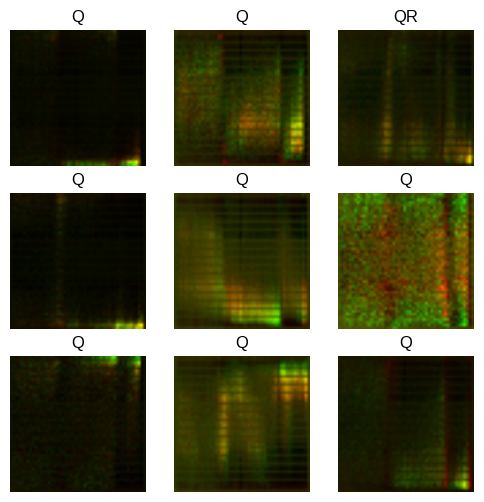

In [11]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 238MB/s]


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.004365158267319202


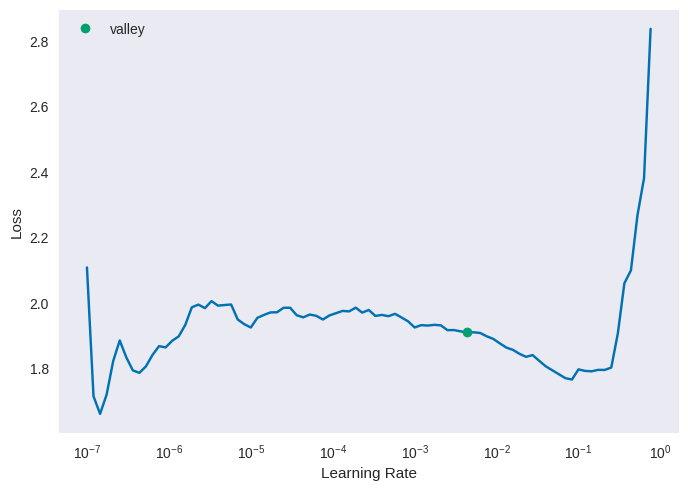

In [12]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [13]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_max_background_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,time
0,0.498376,0.394084,0.868359,01:14


Better model found at epoch 0 with valid_loss value: 0.39408445358276367.


epoch,train_loss,valid_loss,accuracy,time
0,0.136553,0.082907,0.972037,01:46
1,0.075560,0.105776,0.963433,01:45
2,0.078962,0.055719,0.981501,01:46
3,0.054722,0.124391,0.954829,01:46
4,0.062206,0.104402,0.973328,01:46
5,0.048833,0.021162,0.992687,01:46
6,0.024218,0.026164,0.992687,01:46
7,0.017165,0.032916,0.992902,01:46
8,0.028305,0.028844,0.992902,01:46


Better model found at epoch 0 with valid_loss value: 0.08290702104568481.
Better model found at epoch 2 with valid_loss value: 0.055718809366226196.
Better model found at epoch 5 with valid_loss value: 0.02116219513118267.
No improvement since epoch 5: early stopping


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

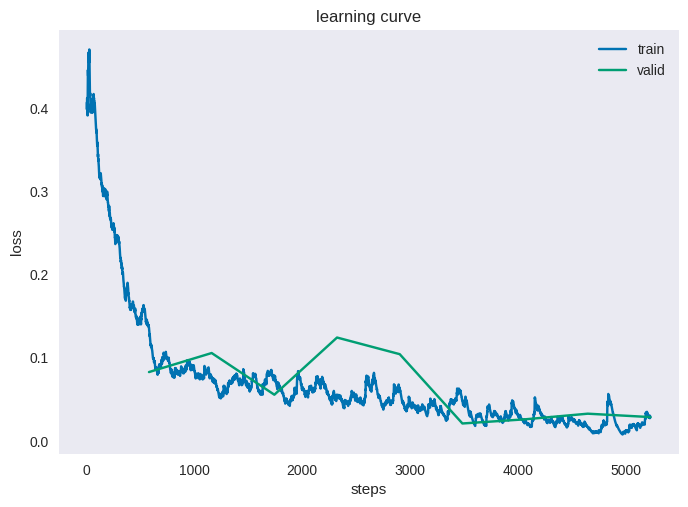

In [14]:
learn.recorder.plot_loss()
learn.load('equivalent_bins_max_background_model')

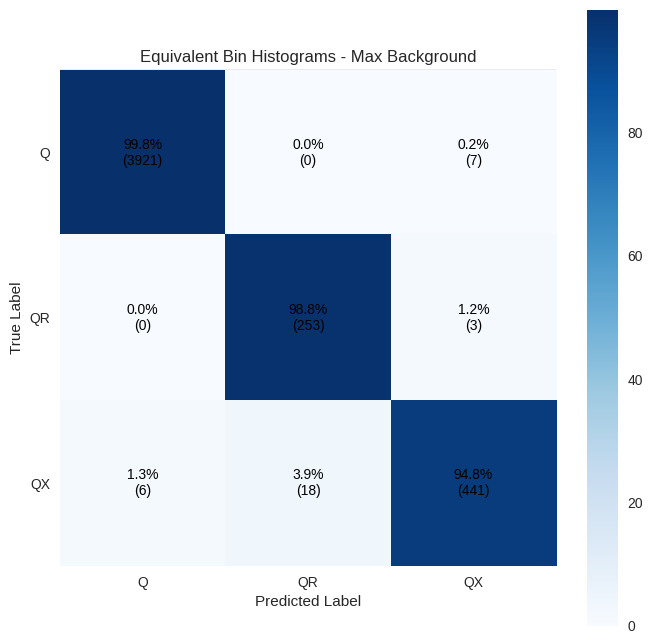

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Equivalent Bin Histograms - Max Background")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.show()

In [17]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       1.00      1.00      1.00      3928
          QR       0.93      0.99      0.96       256
          QX       0.98      0.95      0.96       465

    accuracy                           0.99      4649
   macro avg       0.97      0.98      0.97      4649
weighted avg       0.99      0.99      0.99      4649



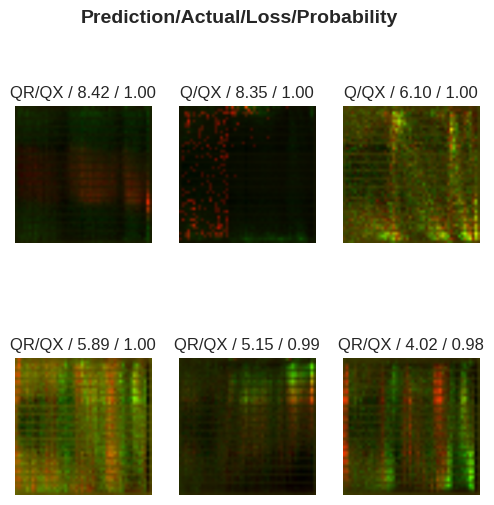

In [18]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

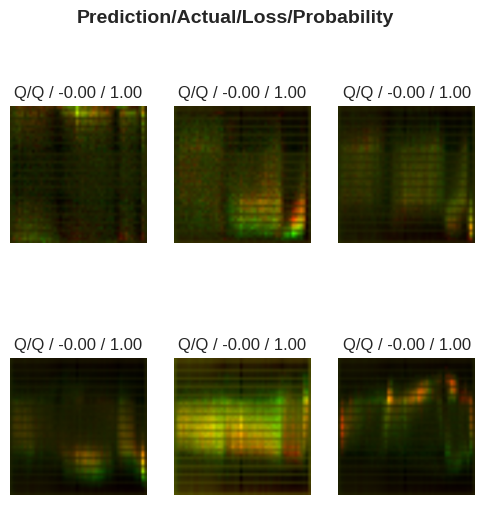

In [19]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

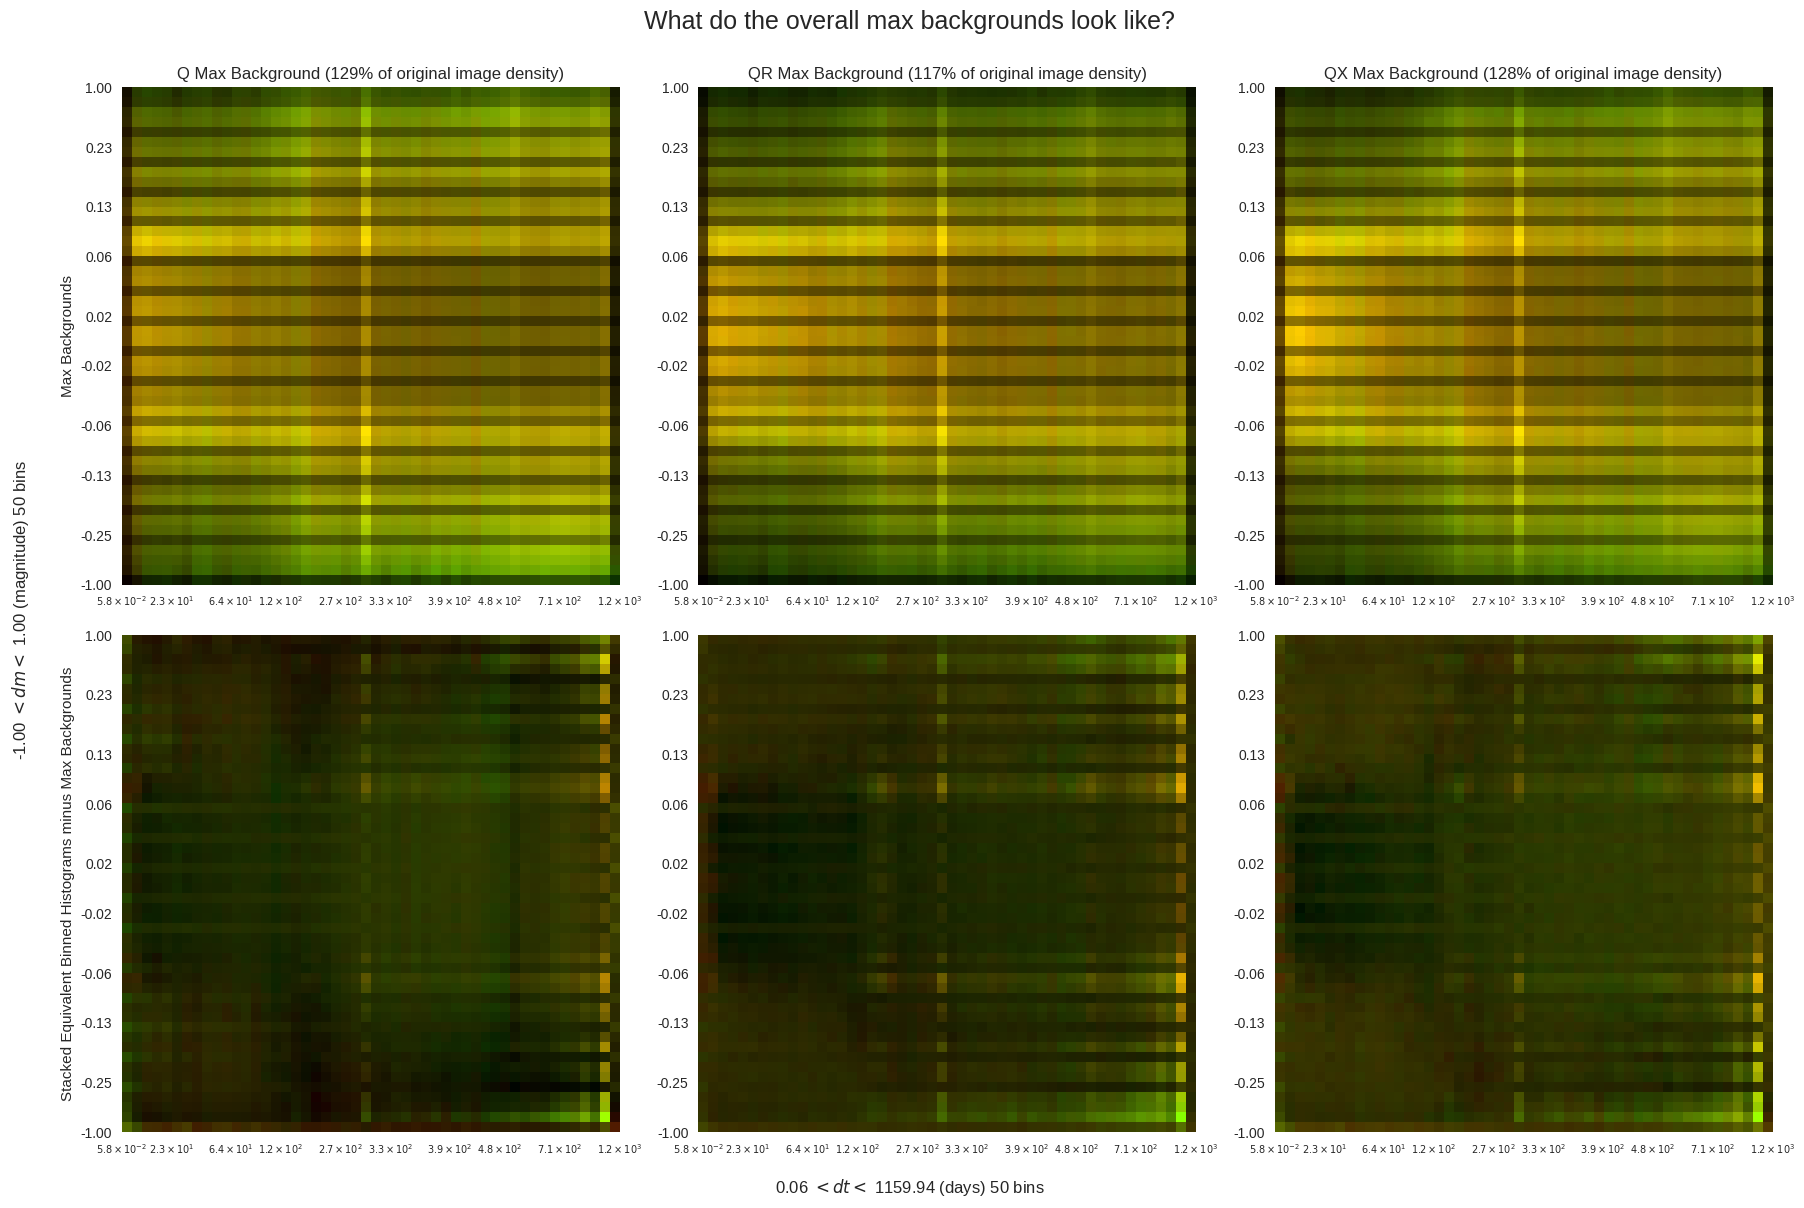

In [39]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

max_backgrounds = [Q_max_background, QR_max_background, QX_max_background]
total_densities = [background.sum() / 2 for background in max_backgrounds]
background_titles = [f'Q Max Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Max Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Max Background ({total_densities[2]:.0%} of original image density)']

for ax, max_background, title in zip(axs[0, :], max_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(max_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Max Backgrounds')

histograms_max_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_max_background'].sum()),
                             norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_max_background'].sum()),
                             norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_max_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_max_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Equivalent Binned Histograms minus Max Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall max backgrounds look like?', size=18, y=1)

plt.tight_layout()

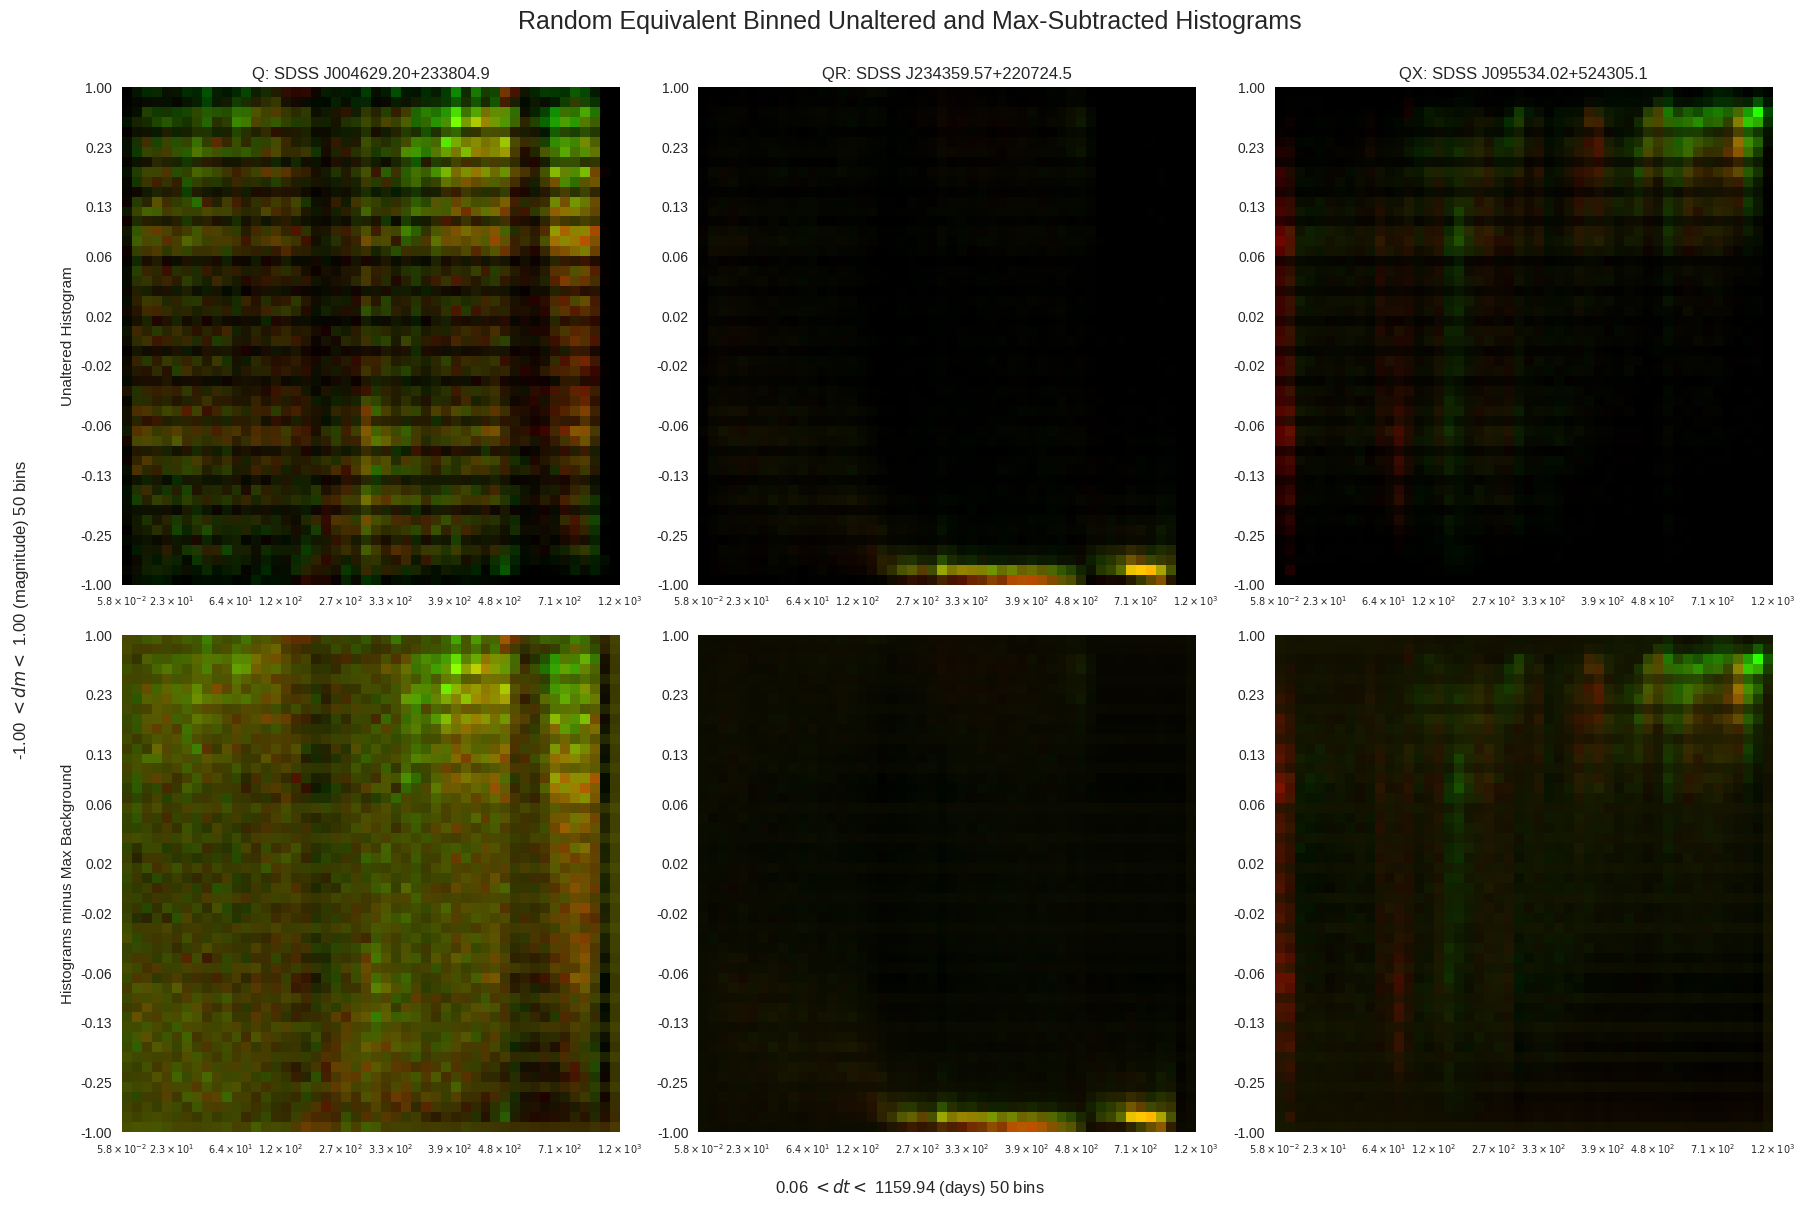

In [45]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
max_subtracted_histograms = [obj['histogram_minus_max_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], max_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Max Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Equivalent Binned Unaltered and Max-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# Trying this with mean background subtraction

In [47]:
Q_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.5244022167829767
rank sv: 126
error:  0.07337967504152151
rank sv: 92
error:  0.004848282875226505
rank sv: 217
error:  0.0001279620503959334
rank sv: 175
error:  3.177614346375711e-06
rank sv: 174
error:  1.1965934704810087e-07
rank sv: 174
error:  4.527603761513188e-09
rank sv: 1
error:  0.511938086547225
rank sv: 126
error:  0.08110556358450864
rank sv: 84
error:  0.005084535787600408
rank sv: 209
error:  0.0001224456225970956
rank sv: 174
error:  3.2583605208108692e-06
rank sv: 299
error:  1.4371836343878213e-07
rank sv: 223
error:  8.110958225726472e-09
rank sv: 1
error:  0.4524322077378224
rank sv: 65
error:  0.05362154082772533
rank sv: 62
error:  0.0026655461904673675
rank sv: 126
error:  7.530508580580945e-05
rank sv: 190
error:  2.0641530138414347e-06
rank sv: 167
error:  8.602103648533319e-08
rank sv: 167
error:  5.59179935432101e-09
rank sv: 1
error:  0.45789949053083917
rank sv: 65
error:  0.05914807574815991
rank sv: 61
error:  0.00275400542364499
ran

In [48]:
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_mean_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_mean_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_mean_background))

In [49]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_mean_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

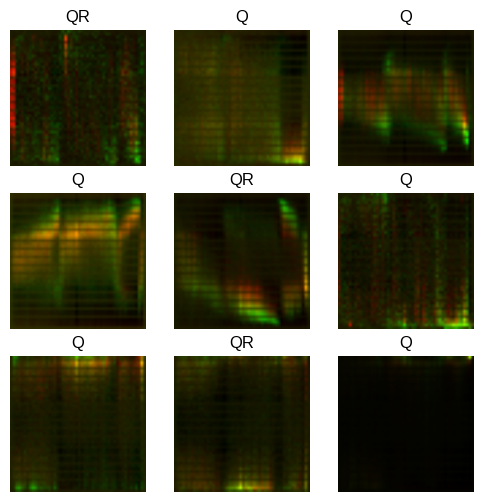

In [50]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.007585775572806597


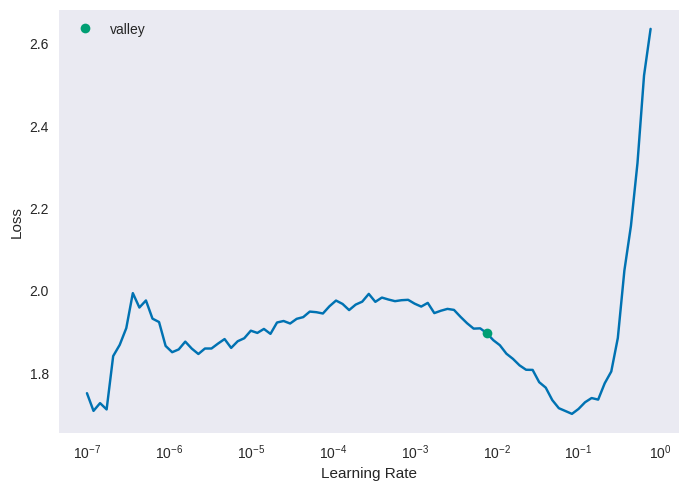

In [51]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [52]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_mean_background_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.538921,0.473388,0.854162,0.145838,01:17


Better model found at epoch 0 with valid_loss value: 0.4733884036540985.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.108307,0.084656,0.970531,0.029469,01:46
1,0.089821,0.075692,0.973543,0.026457,01:46
2,0.079741,0.079861,0.969671,0.030329,01:46
3,0.068292,0.069211,0.977845,0.022155,01:46
4,0.054871,0.030091,0.989890,0.010110,01:46
5,0.061051,0.043753,0.982147,0.017853,01:46
6,0.040780,0.056426,0.981286,0.018714,01:46
7,0.027847,0.046696,0.986234,0.013766,01:46


Better model found at epoch 0 with valid_loss value: 0.08465585112571716.
Better model found at epoch 1 with valid_loss value: 0.0756923109292984.
Better model found at epoch 3 with valid_loss value: 0.0692114308476448.
Better model found at epoch 4 with valid_loss value: 0.03009125031530857.
No improvement since epoch 4: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


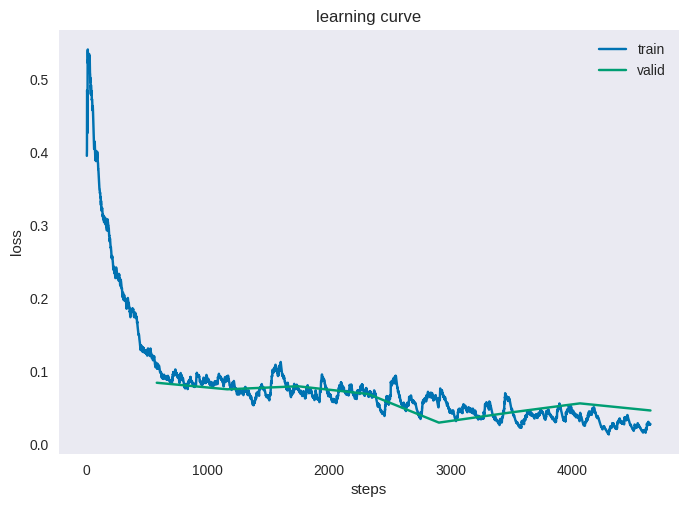

In [53]:
learn.recorder.plot_loss()
learn.load('equivalent_bins_mean_background_model')

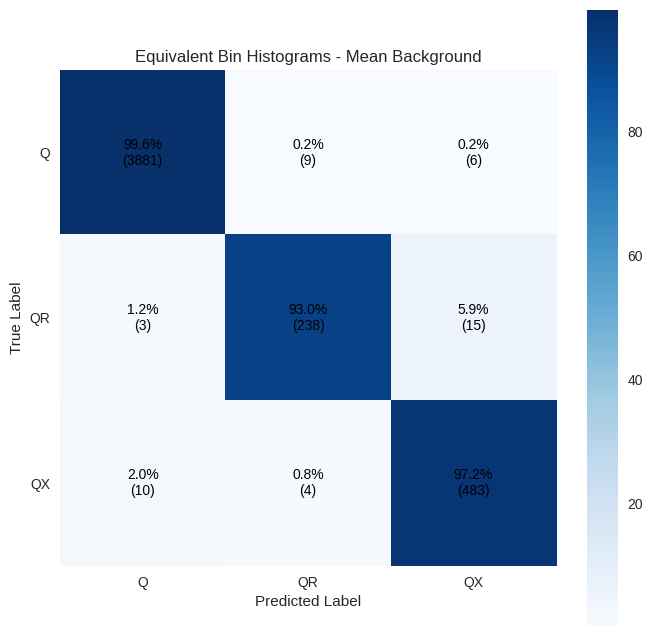

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Equivalent Bin Histograms - Mean Background")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.grid(False)
plt.show()

In [55]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       1.00      1.00      1.00      3896
          QR       0.95      0.93      0.94       256
          QX       0.96      0.97      0.97       497

    accuracy                           0.99      4649
   macro avg       0.97      0.97      0.97      4649
weighted avg       0.99      0.99      0.99      4649



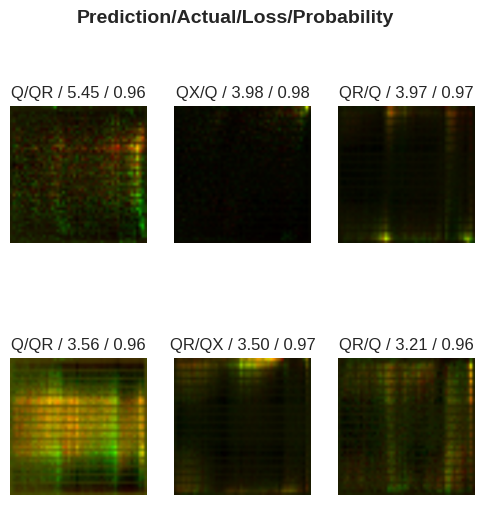

In [56]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

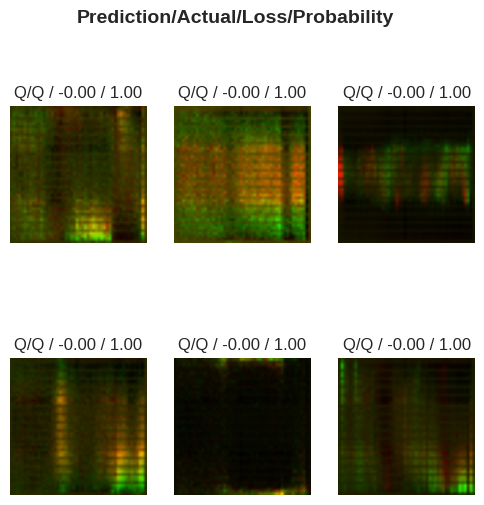

In [57]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

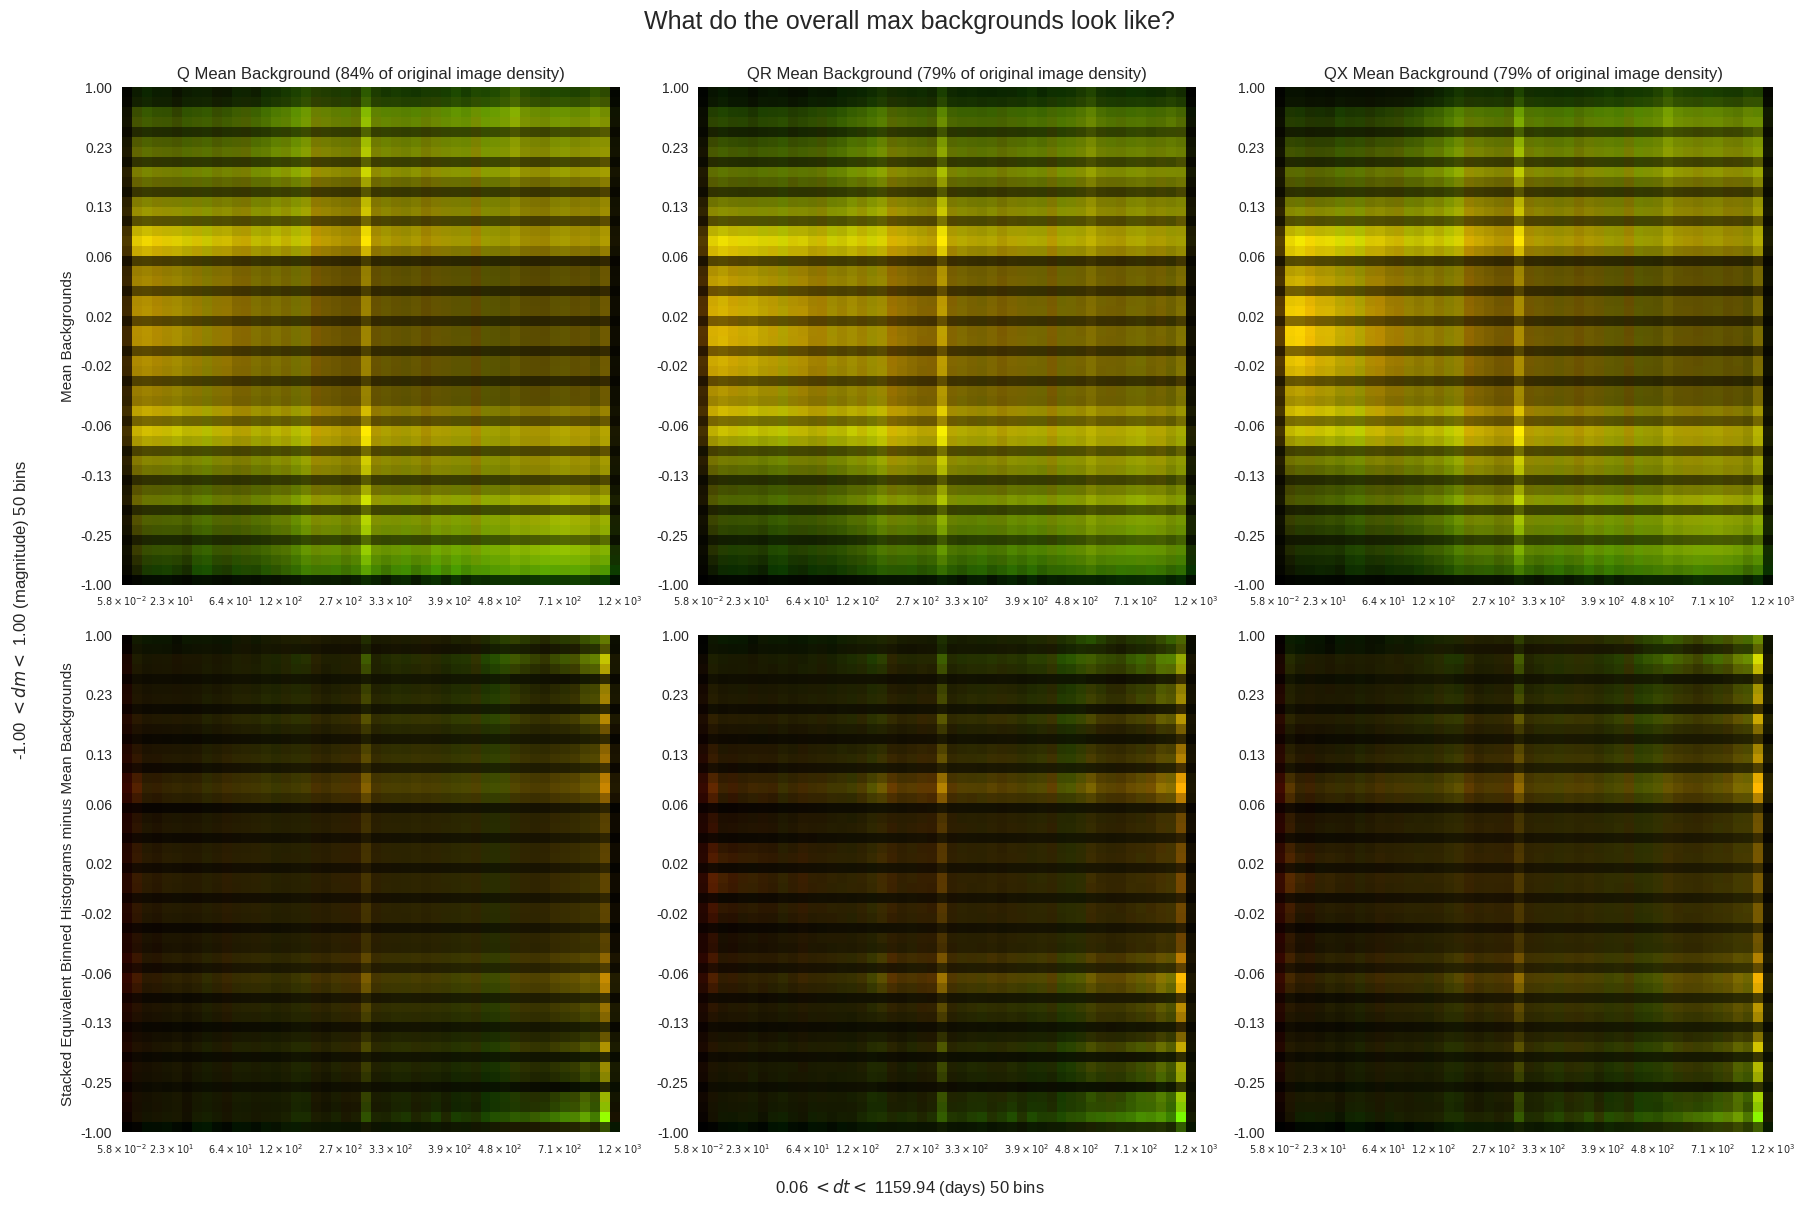

In [58]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

mean_backgrounds = [Q_mean_background, QR_mean_background, QX_mean_background]
total_densities = [background.sum() / 2 for background in mean_backgrounds]
background_titles = [f'Q Mean Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Mean Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Mean Background ({total_densities[2]:.0%} of original image density)']

for ax, mean_background, title in zip(axs[0, :], mean_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(mean_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Mean Backgrounds')

histograms_mean_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_mean_background'].sum()),
                              norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_mean_background'].sum()),
                              norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_mean_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_mean_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Equivalent Binned Histograms minus Mean Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall max backgrounds look like?', size=18, y=1)

plt.tight_layout()

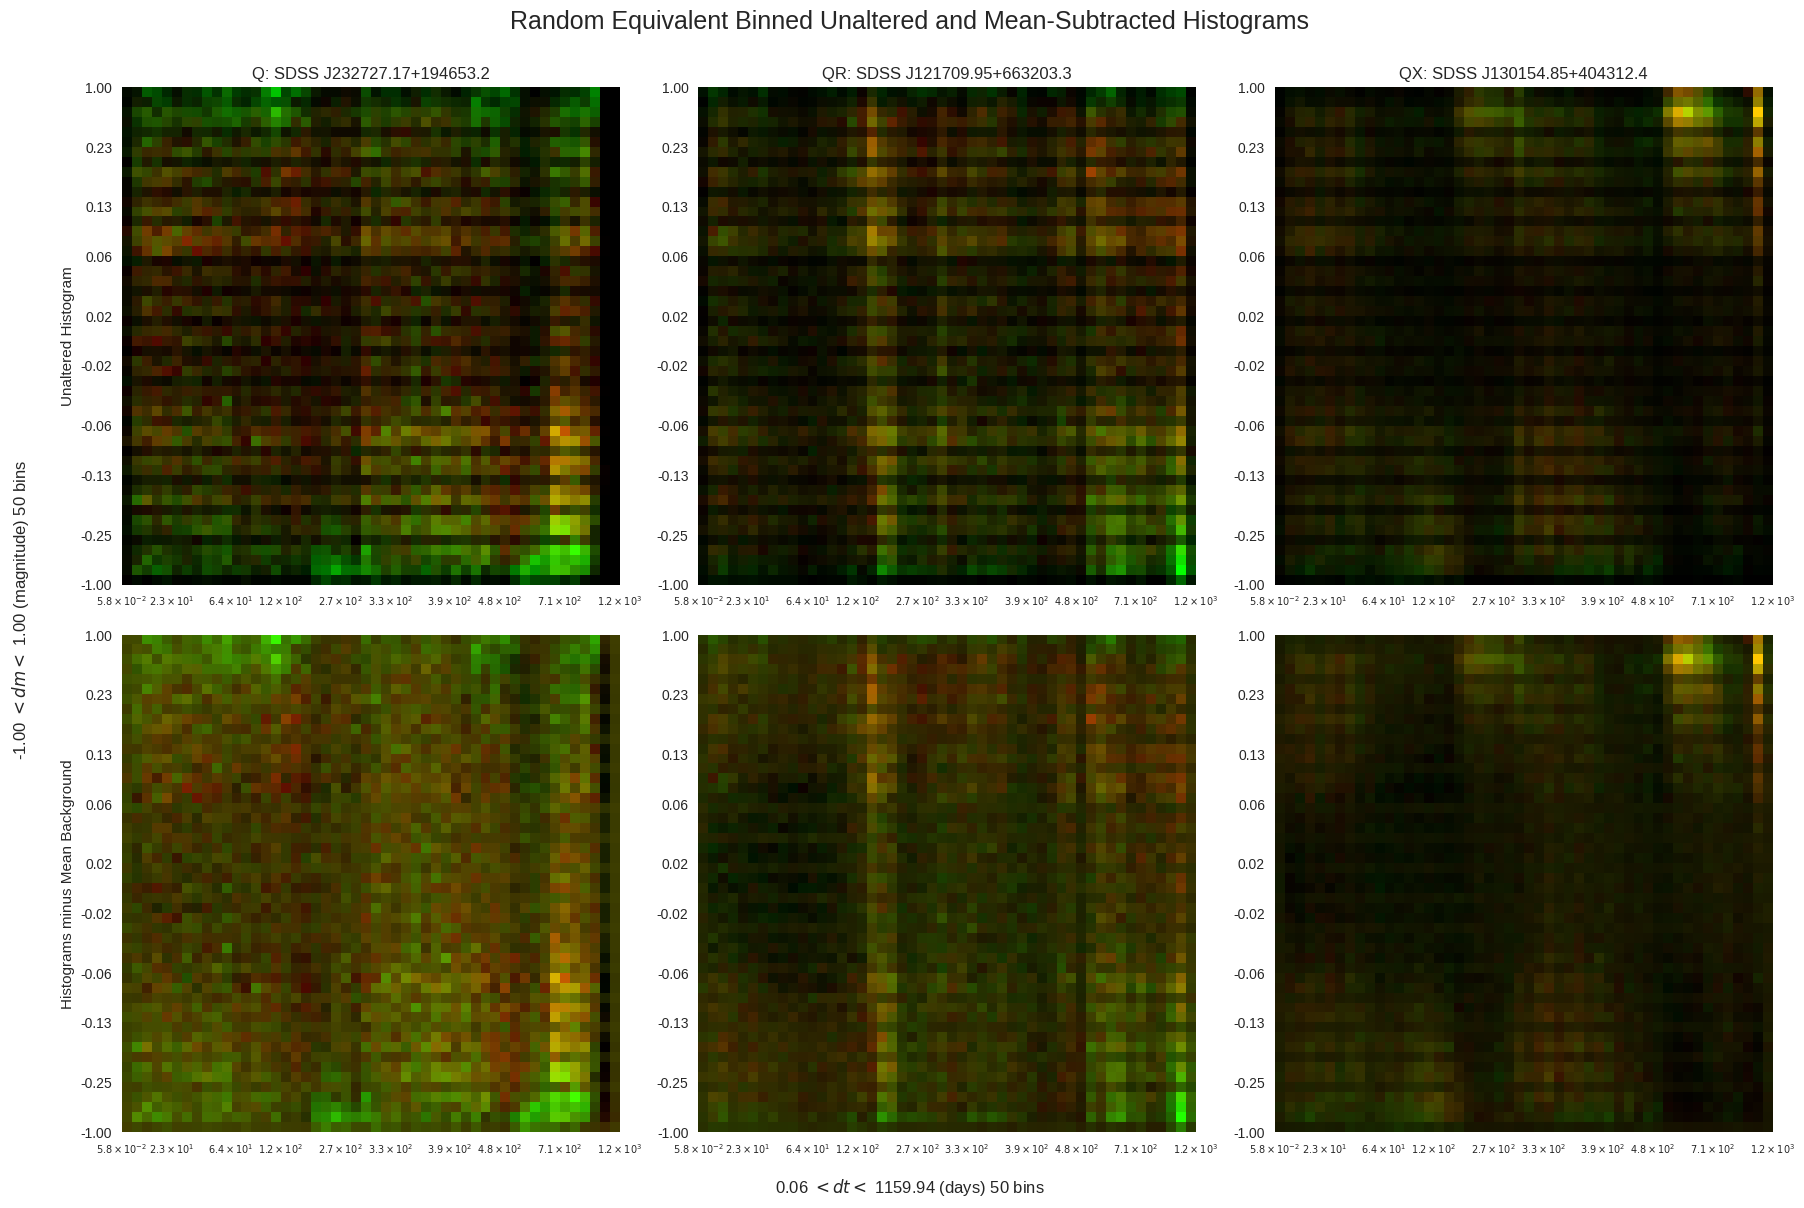

In [59]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
mean_subtracted_histograms = [obj['histogram_minus_mean_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], mean_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Mean Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Equivalent Binned Unaltered and Mean-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# Trying this with mean background subtraction

In [60]:
Q_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.5244028867725933
rank sv: 126
error:  0.07337249031289637
rank sv: 92
error:  0.004847295064815701
rank sv: 217
error:  0.00012804463152073684
rank sv: 175
error:  3.2044270915525326e-06
rank sv: 174
error:  1.2444816979450712e-07
rank sv: 174
error:  4.156014066997691e-09
rank sv: 1
error:  0.5119420488939266
rank sv: 126
error:  0.08109878096585753
rank sv: 84
error:  0.005088447820986933
rank sv: 209
error:  0.00012351191925829373
rank sv: 174
error:  3.292874371522224e-06
rank sv: 299
error:  1.4953985155457215e-07
rank sv: 225
error:  7.992462480984525e-09
rank sv: 1
error:  0.4524324410540552
rank sv: 65
error:  0.05364651156086576
rank sv: 61
error:  0.0026680055065484844
rank sv: 125
error:  7.598700003836393e-05
rank sv: 189
error:  2.0519939810974046e-06
rank sv: 167
error:  9.259787971732298e-08
rank sv: 167
error:  6.039918314130447e-09
rank sv: 1
error:  0.4578867315001064
rank sv: 65
error:  0.059134139253582185
rank sv: 60
error:  0.00275883840793773

In [61]:
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_median_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_median_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_median_background))

In [62]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_median_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

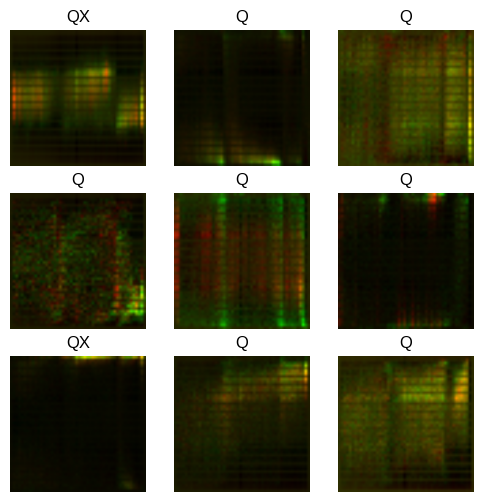

In [63]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.001737800776027143


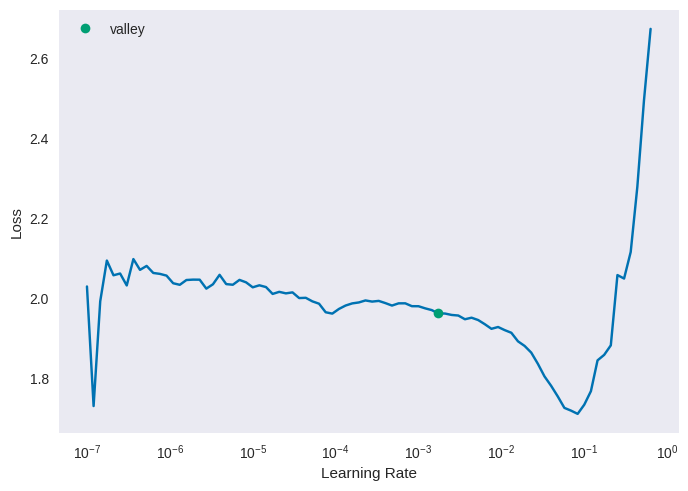

In [64]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [65]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_median_background_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.616695,0.501897,0.837384,0.162616,01:17


Better model found at epoch 0 with valid_loss value: 0.5018967986106873.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.251320,0.223210,0.924285,0.075715,01:46
1,0.126261,0.118734,0.957410,0.042590,01:46
2,0.098385,0.094565,0.968380,0.031620,01:46
3,0.089858,0.050222,0.981932,0.018068,01:46
4,0.044552,0.047209,0.985803,0.014197,01:46
5,0.058668,0.045237,0.984298,0.015702,01:46
6,0.024752,0.051407,0.984513,0.015487,01:46
7,0.030764,0.054830,0.982577,0.017423,01:46
8,0.017143,0.022826,0.992902,0.007098,01:46
9,0.012938,0.015567,0.995268,0.004732,01:46


Better model found at epoch 0 with valid_loss value: 0.22320996224880219.
Better model found at epoch 1 with valid_loss value: 0.11873430758714676.
Better model found at epoch 2 with valid_loss value: 0.0945650041103363.
Better model found at epoch 3 with valid_loss value: 0.05022206902503967.
Better model found at epoch 4 with valid_loss value: 0.04720942676067352.
Better model found at epoch 5 with valid_loss value: 0.045236531645059586.
Better model found at epoch 8 with valid_loss value: 0.02282586134970188.
Better model found at epoch 9 with valid_loss value: 0.015567108988761902.
Better model found at epoch 12 with valid_loss value: 0.010299819521605968.
No improvement since epoch 12: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


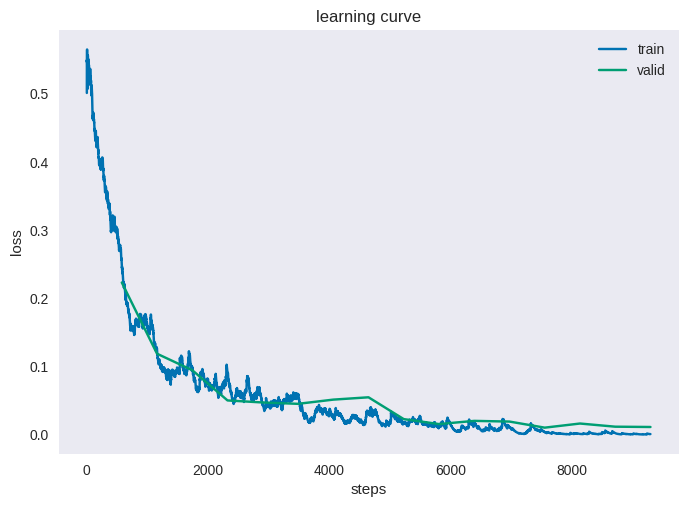

In [66]:
learn.recorder.plot_loss()
learn.load('equivalent_bins_median_background_model')

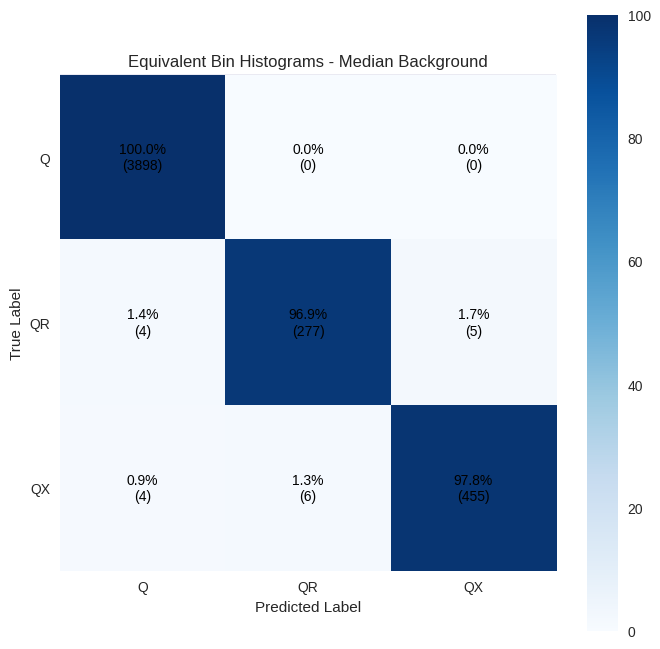

In [67]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title("Equivalent Bin Histograms - Median Background")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im)
plt.grid(False)
plt.show()

In [68]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       1.00      1.00      1.00      3898
          QR       0.98      0.97      0.97       286
          QX       0.99      0.98      0.98       465

    accuracy                           1.00      4649
   macro avg       0.99      0.98      0.99      4649
weighted avg       1.00      1.00      1.00      4649



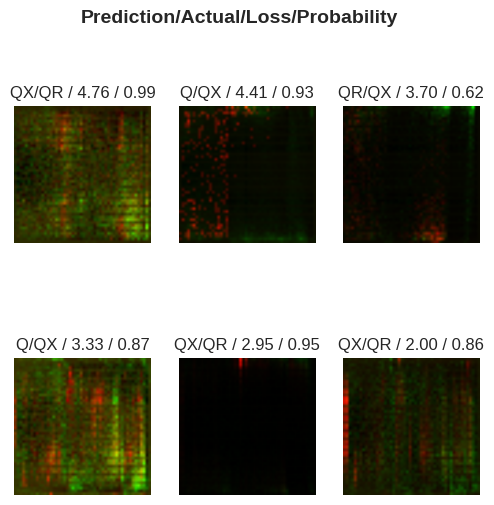

In [69]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

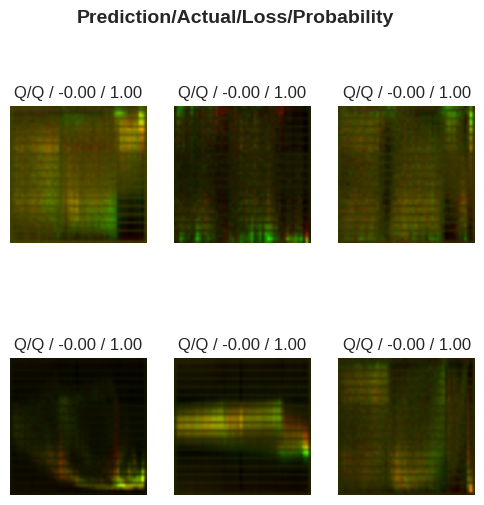

In [70]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

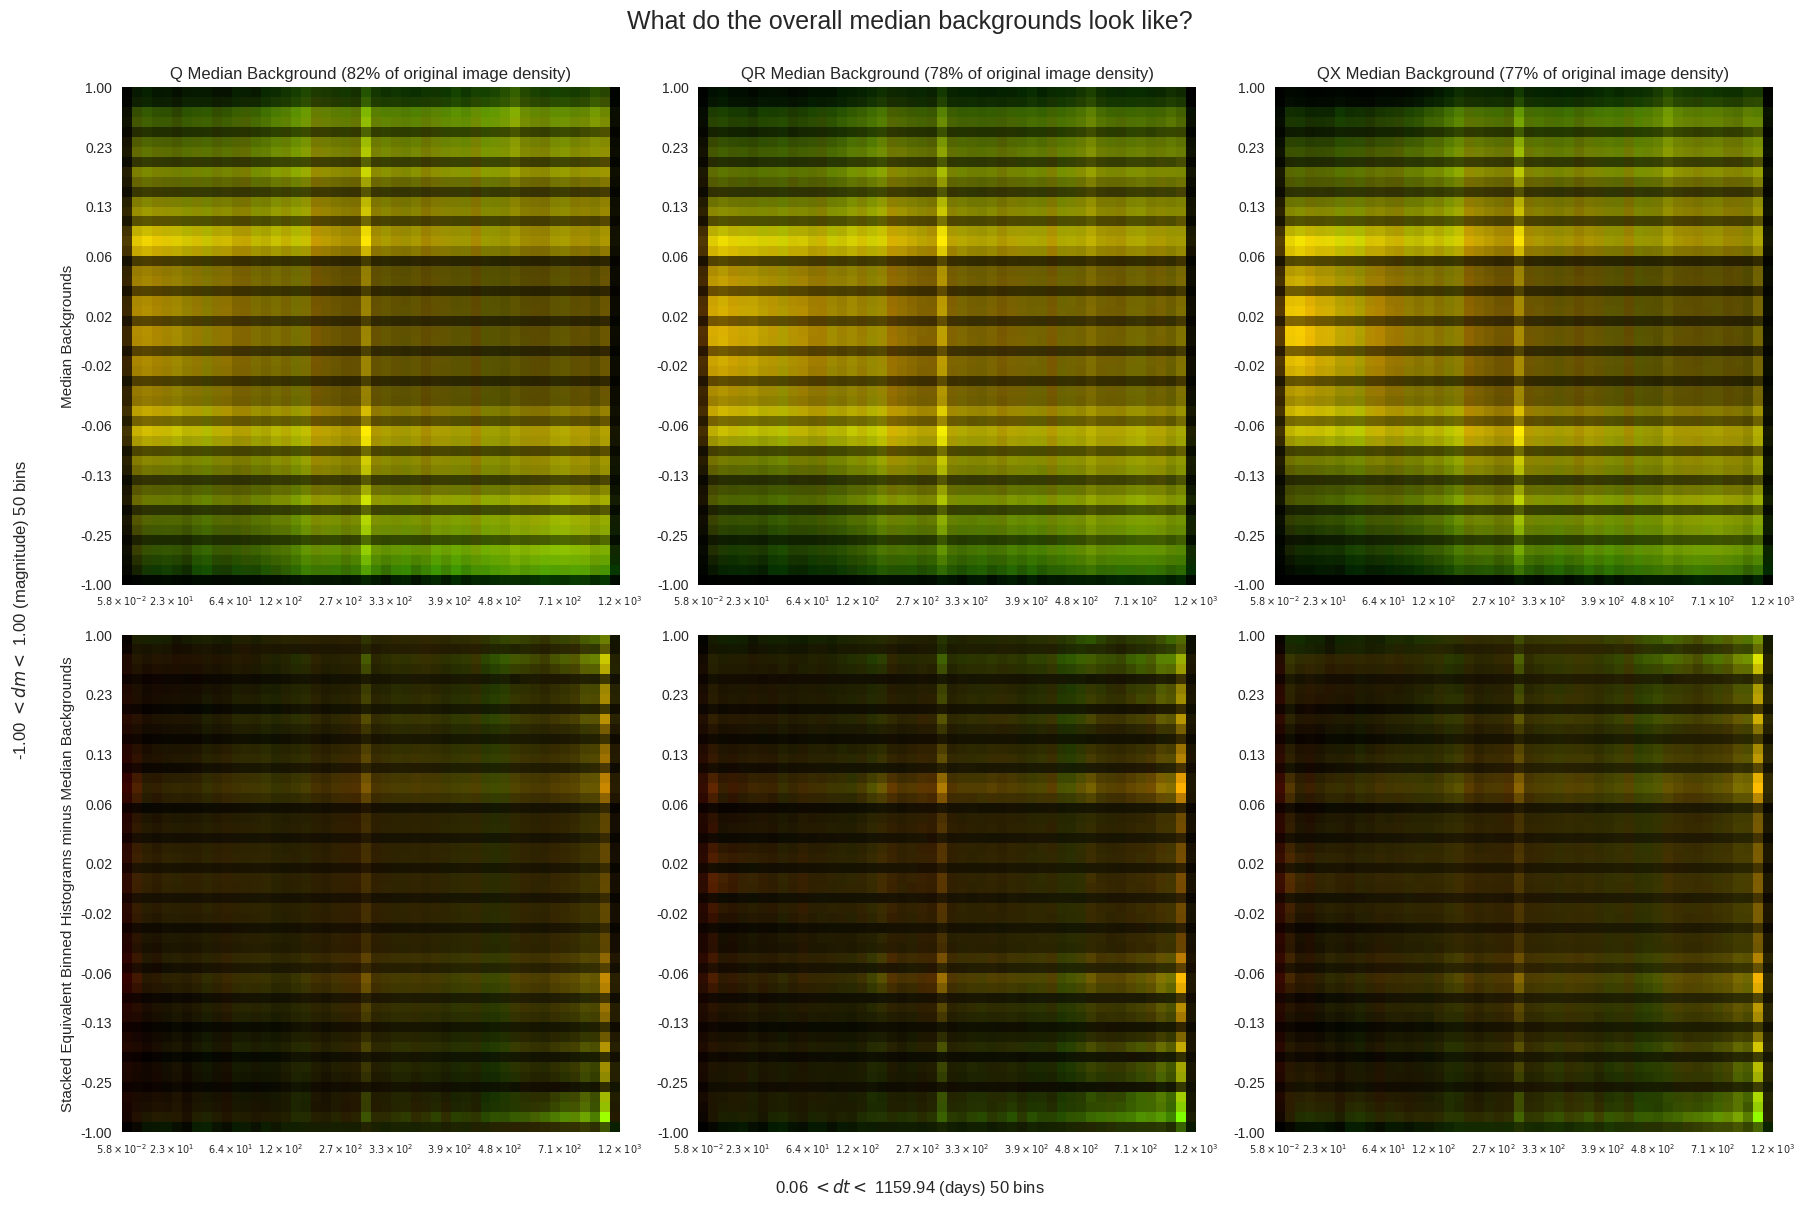

In [71]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

median_backgrounds = [Q_median_background, QR_median_background, QX_median_background]
total_densities = [background.sum() / 2 for background in median_backgrounds]
background_titles = [f'Q Median Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Median Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Median Background ({total_densities[2]:.0%} of original image density)']

for ax, median_background, title in zip(axs[0, :], median_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(median_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Median Backgrounds')

histograms_median_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_median_background'].sum()),
                                norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_median_background'].sum()),
                                norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_median_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_median_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Equivalent Binned Histograms minus Median Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall median backgrounds look like?', size=18, y=1)

plt.tight_layout()

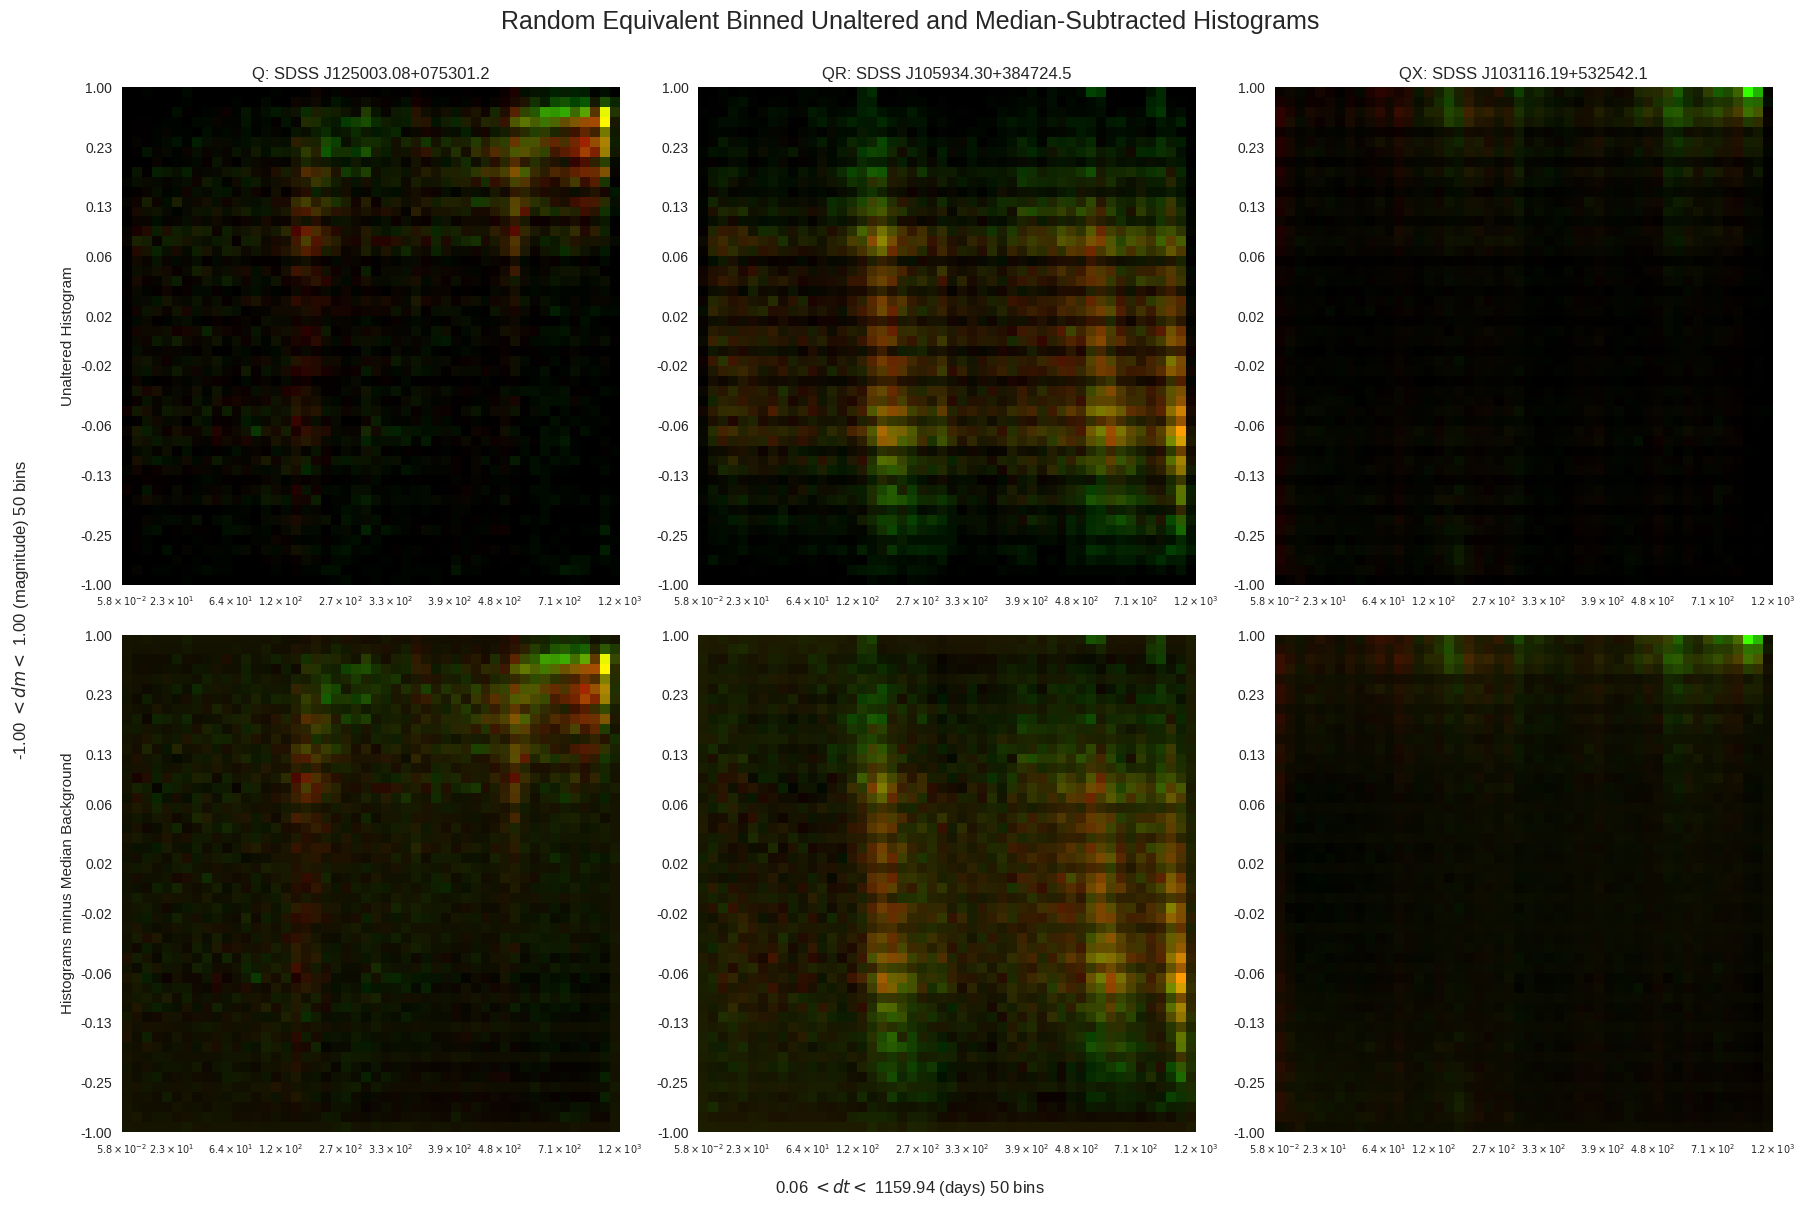

In [72]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
median_subtracted_histograms = [obj['histogram_minus_median_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], median_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Median Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Equivalent Binned Unaltered and Median-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# What are the distributions in background contribution?

In [100]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])]
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']

In [101]:
def get_FBPA_LS_histograms(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    L_array = []
    S_array = []
    for i in range(len(M_r[0, :])):
        L_histogram = np.zeros_like(histogram_list[0])
        S_histogram = np.zeros_like(histogram_list[0])

        L_r_histogram, L_g_histogram = L_r[:, i].reshape(histogram_list[0][:, :, 0].shape), L_g[:, i].reshape(histogram_list[0][:, :, 0].shape)
        S_r_histogram, S_g_histogram = S_r[:, i].reshape(histogram_list[0][:, :, 0].shape), S_g[:, i].reshape(histogram_list[0][:, :, 0].shape)

        L_histogram[:, :, 0] = L_r_histogram
        L_histogram[:, :, 1] = L_g_histogram
        S_histogram[:, :, 0] = S_r_histogram
        S_histogram[:, :, 1] = S_g_histogram

        L_array.append(L_histogram)
        S_array.append(S_histogram)

    return L_array, S_array

In [102]:
dmdt_by_Name_Band_Q = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].copy()
dmdt_by_Name_Band_QR = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].copy()
dmdt_by_Name_Band_QX = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].copy()

del dmdt_by_Name_Band

In [103]:
for df in [dmdt_by_Name_Band_Q, dmdt_by_Name_Band_QR, dmdt_by_Name_Band_QX]:
    L_array, S_array = get_FBPA_LS_histograms(df['histogram'].to_numpy())
    df['L'] = L_array
    df['S'] = S_array

rank sv: 1
error:  0.5244017835191028
rank sv: 126
error:  0.07338774633519242
rank sv: 91
error:  0.004851945398191551
rank sv: 216
error:  0.00012832321900124602
rank sv: 174
error:  3.2017589610991716e-06
rank sv: 173
error:  1.2009192916277665e-07
rank sv: 172
error:  3.2410923435632125e-09
rank sv: 1
error:  0.5119417941216006
rank sv: 126
error:  0.08110732730271324
rank sv: 84
error:  0.005083791326389183
rank sv: 209
error:  0.0001224757426212944
rank sv: 174
error:  3.24535478127114e-06
rank sv: 174
error:  1.5021808719576673e-07
rank sv: 299
error:  5.970626543280291e-09
rank sv: 1
error:  0.4523897645887889
rank sv: 65
error:  0.053642047010147284
rank sv: 61
error:  0.0026671716184524462
rank sv: 125
error:  7.541326434219553e-05
rank sv: 125
error:  2.21247649993995e-06
rank sv: 189
error:  9.500257462406097e-08
rank sv: 166
error:  5.4004813813561604e-09
rank sv: 1
error:  0.4578997650468494
rank sv: 65
error:  0.059166991320352164
rank sv: 61
error:  0.002756230194818489

In [107]:
dmdt_by_Name_Band = pd.concat([dmdt_by_Name_Band_Q, dmdt_by_Name_Band_QR, dmdt_by_Name_Band_QX], axis=0, ignore_index=True)

In [110]:
dmdt_by_Name_Band.to_pickle(dmdt_by_Name_Band_file.split('.')[0] + '_LS.pkl')

In [112]:
def get_FBPA_MLS(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    return M_r, L_r, S_r, M_g, L_g, S_g

def get_background_contribution(M, L, S):
    L_ratio_list = np.array([L[:, i].sum() / M[:, i].sum() for i in range(len(L[0, :]))])
    S_ratio_list = np.array([S[:, i].sum() / M[:, i].sum() for i in range(len(L[0, :]))])
    return L_ratio_list, S_ratio_list

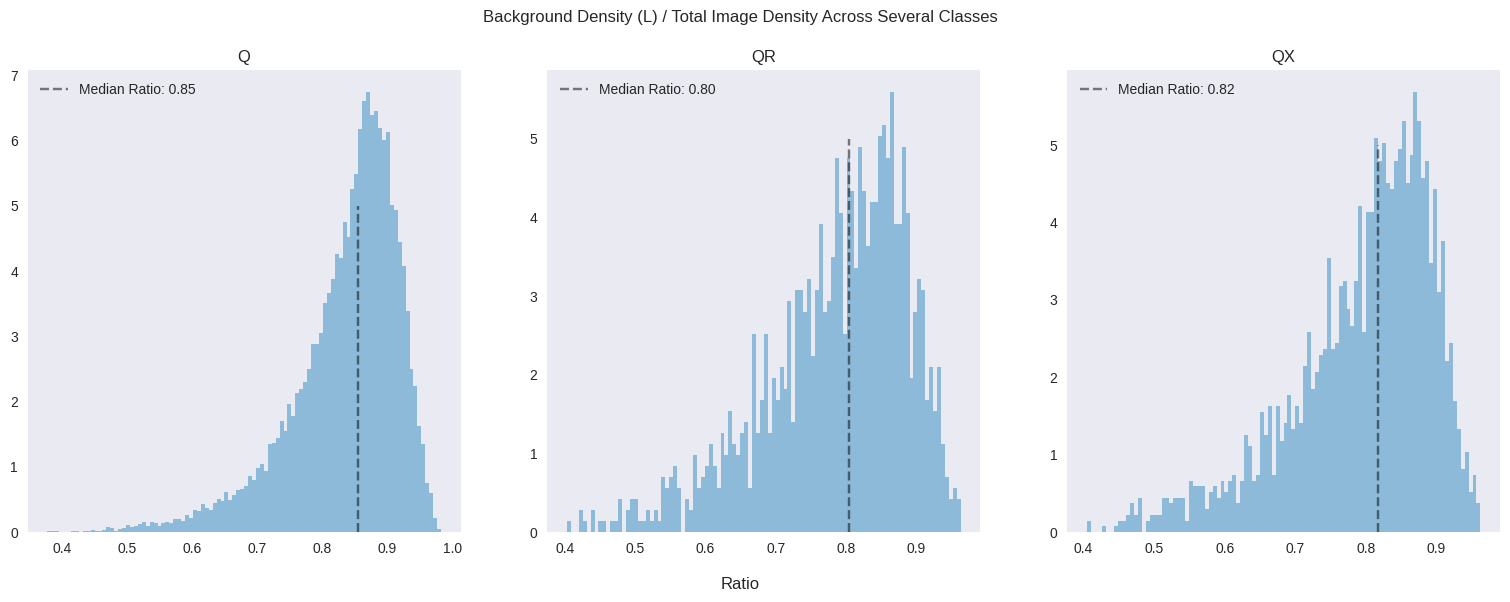

In [115]:
object_types = ['Q', 'QR', 'QX']
nbins = 100
alpha = 0.4

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(19, 6))

for ax, object_type in zip(axs, object_types):
    df = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == object_type]
    histogram_density_array = df['histogram'].apply(np.sum).to_numpy()
    L_density_array = df['L'].apply(np.sum).to_numpy()
    ratio_array = L_density_array / histogram_density_array

    median = np.median(ratio_array)
    ax.vlines(median, ymin=0, ymax=5, colors='black', linestyles='--', alpha=0.5, label=f'Median Ratio: {median:.2f}')

    ax.hist(ratio_array, bins=nbins, alpha=alpha, density=True)
    ax.set_title(object_type)
    # ax.set_xlim(0, 2)

fig.suptitle('Background Density (L) / Total Image Density Across Several Classes')
fig.supxlabel('Cont Density')
fig.supxlabel('Ratio')

for ax in axs:
    ax.legend()

plt.show()